# The initial dataset includes sp500 companies and ticker information and is ready to be used. Also the redshift cluster is created and running

In our setup we have a sp500_companies and sp500_tickers tables stored in a database on a redshift cluster

- in the next step we use the dimensions tables to build a fact table to store financial algorithms. I decided to run it a seperate notebook, apart from from the initial datasets colection. This seperation make it easier to develop more financial algorithms on demand



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import psycopg2
import configparser
config = configparser.ConfigParser()
config.read_file(open('dwh.cfg'))

In [2]:
config = configparser.ConfigParser()
config.read('dwh.cfg')


['dwh.cfg']

# 1. The full list and Information about the S&P 500 companies
The S&P 500 stock market index, maintained by S&P Dow Jones Indices, comprises 505 common stocks issued by 500 large-cap companies and traded on American stock exchanges (including the 30 companies that comprise the Dow Jones Industrial Average), and covers about 80 percent of the American equity market by capitalization. The index is weighted by free-float market capitalization, so more valuable companies account for relatively more of the index. The index constituents and the constituent weights are updated regularly using rules published by S&P Dow Jones Indices. Although the index is called the S&P "500", the index contains 505 stocks because it includes two share classes of stock from 5 of its component companies

In [3]:
config = configparser.ConfigParser()

config.read('dwh.cfg')

conn = psycopg2.connect("host={} dbname={} user={} password={} port={}".format(*config['CLUSTER'].values()))
cur = conn.cursor()

df = pd.read_sql_query("""select symbol, company_name, wiki, sector, subsector from public.sp500_companies order by symbol""", conn)
display(df)

conn.close()


,symbol,company_name,wiki,sector,subsector
0,A,Agilent Technologies Inc,https://en.wikipedia.org/wiki/Agilent_Technolo...,Health Care,Health Care Equipment
1,AAL,American Airlines Group,https://en.wikipedia.org/wiki/American_Airline...,Industrials,Airlines
2,AAP,Advance Auto Parts,https://en.wikipedia.org/wiki/Advance_Auto_Parts,Consumer Discretionary,Automotive Retail
3,AAPL,Apple Inc.,https://en.wikipedia.org/wiki/Apple_Inc.,Information Technology,"Technology Hardware, Storage & Peripherals"
4,ABBV,AbbVie Inc.,https://en.wikipedia.org/wiki/AbbVie_Inc.,Health Care,Pharmaceuticals
5,ABC,AmerisourceBergen Corp,https://en.wikipedia.org/wiki/AmerisourceBerge...,Health Care,Health Care Distributors
6,ABMD,ABIOMED Inc,https://en.wikipedia.org/wiki/Abiomed,Health Care,Health Care Equipment
7,ABT,Abbott Laboratories,https://en.wikipedia.org/wiki/Abbott_Laboratories,Health Care,Health Care Equipment
8,ACN,Accenture plc,https://en.wikipedia.org/wiki/Accenture_plc,Information Technology,IT Consulting & Other Services
9,ADBE,Adobe Systems Inc,https://en.wikipedia.org/wiki/Adobe_Systems_Inc,Information Technology,Application Software


# 2. PLOT SMA 30 - SIMPLE MOVING AVERAGE 
https://www.investopedia.com/terms/s/sma.asp
 
## What is Simple Moving Average - SMA?

A simple moving average (SMA) is an arithmetic moving average calculated by adding recent closing prices and then dividing that by the number of time periods in the calculation average. A simple, or arithmetic, moving average that is calculated by adding the closing price of the security for a number of time periods and then dividing this total by that same number of periods. Short-term averages respond quickly to changes in the price of the underlying, while long-term averages are slow to react.


## The Formula For SMA Is
\begin{aligned} &\text{SMA}=\dfrac{A_1 + A_2 + ... + A_n}{n} \\ &\textbf{where:}\\ &A_n=\text{the price of an asset at period } n\\ &n=\text{the number of total periods}\\ \end{aligned}​

In [4]:
config = configparser.ConfigParser()

config.read('dwh.cfg')

conn = psycopg2.connect("host={} dbname={} user={} password={} port={}".format(*config['CLUSTER'].values()))
cur = conn.cursor()

#df = pd.read_sql_query("select date, adj_close from public.sp500_tickers where company = 'MMM'", conn)
df = pd.read_sql_query("select date, adj_close, sma_30 from public.sp500_sma30 where company = 'ABT' order by date asc", conn, index_col='date')

print(df.tail())

conn.close()

            adj_close     sma_30
date                            
2019-09-25  82.860001  84.086334
2019-09-26  82.660004  84.043667
2019-09-27  81.839996  83.973667
2019-09-30  83.669998  83.936667
2019-10-01  81.839996  83.812667


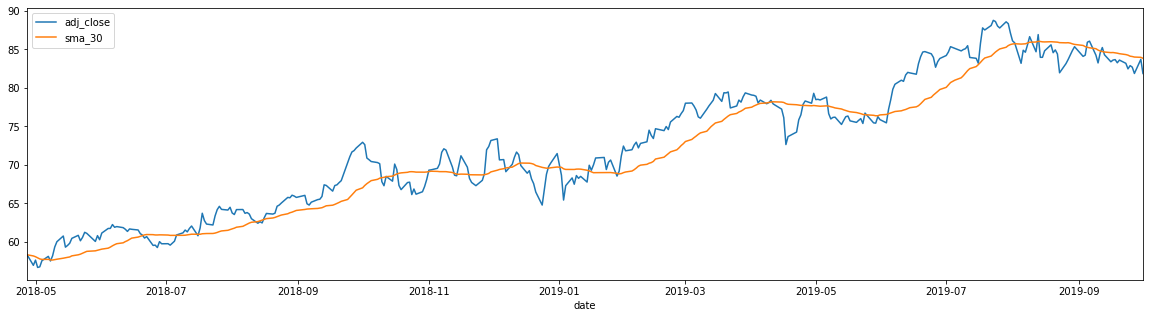

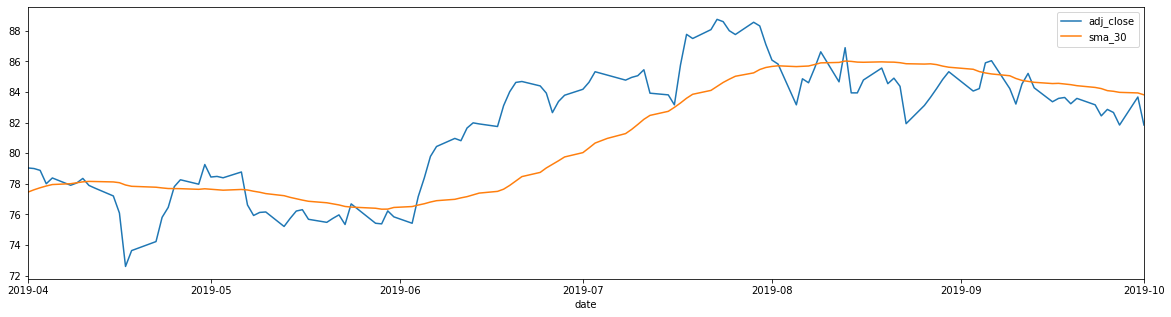

In [6]:
%matplotlib inline

# sma_30 over the last 720 entries
df.tail(360).plot(figsize=(20, 5))

#sma_30 between a time period
startdate = pd.to_datetime("2019-04-01").date()
enddate = pd.to_datetime("2019-10-01").date()
df[startdate:enddate].plot(figsize=(20, 5))

# 3. PLOT BOLLINGER BANDS

https://www.investopedia.com/trading/using-bollinger-bands-to-gauge-trends/



Bollinger Bands® are a popular technical indicators used by traders in all markets, including stocks, futures and currencies. There are a number of uses for Bollinger Bands®, including determining overbought and oversold levels, as a trend following tool, and monitoring for breakouts. There are also some pitfalls of the indicators. In this article, we will address all these areas.
Calculation of Bollinger Bands

Bollinger bands are composed of three lines. One of the more common calculations of Bollinger Bands uses a 20-day simple moving average (SMA) for the middle band. The upper band is calculated by taking the middle band and adding twice the daily standard deviation to that amount. The lower band is calculated by taking the middle band minus two times the daily standard deviation.


## The Bollinger Band® formula consists of the following:

\begin{aligned} &\text{BOLU} = \text {MA} ( \text {TP}, n ) + m * \sigma [ \text {TP}, n ] \\ &\text{BOLD} = \text {MA} ( \text {TP}, n ) - m * \sigma [ \text {TP}, n ] \\ &\textbf{where:} \\ &\text {BOLU} = \text {Upper Bollinger Band} \\ &\text {BOLD} = \text {Lower Bollinger Band} \\ &\text {MA} = \text {Moving average} \\ &\text {TP (typical price)} = ( \text{High} + \text{Low} + \text{Close} ) \div 3 \\ &n = \text {Number of days in smoothing period} \\ &m = \text {Number of standard deviations} \\ &\sigma [ \text {TP}, n ] = \text {Standard Deviation over last } n \text{ periods of TP} \\ \end{aligned}​    

Bollinger Bands consist of a middle band with two outer bands. The middle band is a simple moving average that is usually set at 20 periods. A simple moving average is used because the standard deviation formula also uses a simple moving average. The look-back period for the standard deviation is the same as for the simple moving average. The outer bands are usually set 2 standard deviations above and below the middle band.



In [7]:
config = configparser.ConfigParser()

config.read('dwh.cfg')

conn = psycopg2.connect("host={} dbname={} user={} password={} port={}".format(*config['CLUSTER'].values()))
cur = conn.cursor()

df = pd.read_sql_query("""select date, adj_close, "20_ma", "20_sd", upper_band, lower_band from public.sp500_bollinger where company = 'ABT' order by date asc""", conn, index_col='date')

print(df.tail())

conn.close()

            adj_close      20_ma     20_sd  upper_band  lower_band
date                                                              
2019-09-25  82.860001  84.093000  0.987218   86.067437   82.118564
2019-09-26  82.660004  84.015001  1.037027   86.089054   81.940947
2019-09-27  81.839996  83.866000  1.125580   86.117160   81.614841
2019-09-30  83.669998  83.783500  1.072622   85.928744   81.638256
2019-10-01  81.839996  83.672500  1.154264   85.981028   81.363972


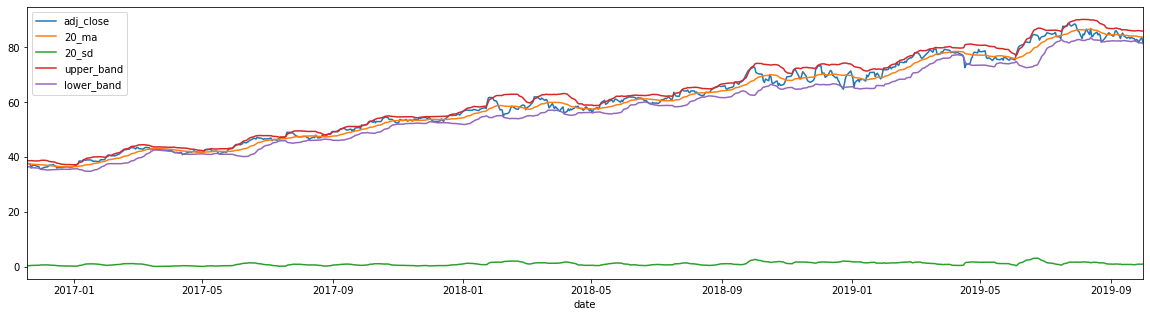

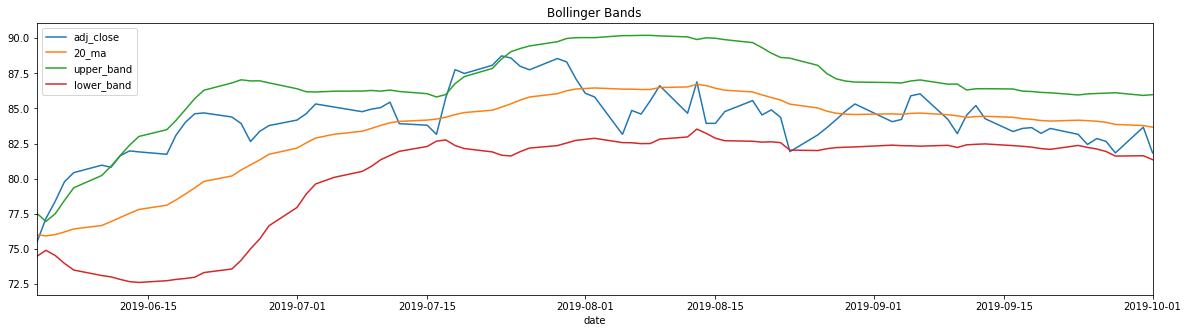

In [8]:
df.tail(720).plot(figsize=(20, 5))

startdate = pd.to_datetime("2019-06-01").date()
enddate = pd.to_datetime("2019-10-01").date()
df[startdate:enddate].plot(y=['adj_close','20_ma', 'upper_band', 'lower_band'], title='Bollinger Bands', figsize=(20, 5))

# 4. PLOT MACD - Moving Average Convergence Divergence

https://www.investopedia.com/terms/m/macd.asp

 What Is Moving Average Convergence Divergence – MACD?

Moving Average Convergence Divergence (MACD) is a trend-following momentum indicator that shows the relationship between two moving averages of a security’s price. The MACD is calculated by subtracting the 26-period Exponential Moving Average (EMA) from the 12-period EMA.

The result of that calculation is the MACD line. A nine-day EMA of the MACD called the "signal line," is then plotted on top of the MACD line, which can function as a trigger for buy and sell signals. Traders may buy the security when the MACD crosses above its signal line and sell - or short - the security when the MACD crosses below the signal line. Moving Average Convergence Divergence (MACD) indicators can be interpreted in several ways, but the more common methods are crossovers, divergences, and rapid rises/falls.

The Formula for MACD:


\begin{aligned} &\text{MACD}=\text{12-Period EMA }-\text{ 26-Period EMA}\end{aligned}


MACD is calculated by subtracting the long-term EMA (26 periods) from the short-term EMA (12 periods). An exponential moving average (EMA) is a type of moving average (MA) that places a greater weight and significance on the most recent data points. The exponential moving average is also referred to as the exponentially weighted moving average. An exponentially weighted moving average reacts more significantly to recent price changes than a simple moving average (SMA), which applies an equal weight to all observations in the period.

## Learning From MACD

The MACD has a positive value whenever the 12-period EMA (blue) is above the 26-period EMA (red) and a negative value when the 12-period EMA is below the 26-period EMA. The more distant the MACD is above or below its baseline indicates that the distance between the two EMAs is growing. In the following chart, you can see how the two EMAs applied to the price chart correspond to the MACD (blue) crossing above or below its baseline (red dashed) in the indicator below the price chart.



    * MACD is calculated by subtracting the 26-period EMA from the 12-period EMA.
    * MACD triggers technical signals when it crosses above (to buy) or below (to sell) its signal line.
    * The speed of crossovers is also taken as a signal of a market is overbought or oversold.
    * MACD helps investors understand whether the bullish or bearish movement in the price is strengthening or weakening.





In [9]:
config = configparser.ConfigParser()

config.read('dwh.cfg')

conn = psycopg2.connect("host={} dbname={} user={} password={} port={}".format(*config['CLUSTER'].values()))
cur = conn.cursor()

df = pd.read_sql_query("""select date, adj_close, "30_mavg", "26_ema", "12_ema", macd, signal, crossover from public.sp500_macd where company = 'ABT' order by date asc""", conn, index_col='date')

print(df.tail())

conn.close()

            adj_close    30_mavg     26_ema     12_ema      macd    signal  \
date                                                                         
2019-09-25  82.860001  84.086334  83.972178  83.968965 -0.003213  0.429949   
2019-09-26  82.660004  84.043667  83.923579  83.868276 -0.055303  0.381424   
2019-09-27  81.839996  83.973667  83.846409  83.712254 -0.134155  0.329866   
2019-09-30  83.669998  83.936667  83.839876  83.709004 -0.130872  0.283792   
2019-10-01  81.839996  83.812667  83.765806  83.565234 -0.200572  0.235356   

            crossover  
date                   
2019-09-25  -0.433162  
2019-09-26  -0.436727  
2019-09-27  -0.464021  
2019-09-30  -0.414664  
2019-10-01  -0.435928  


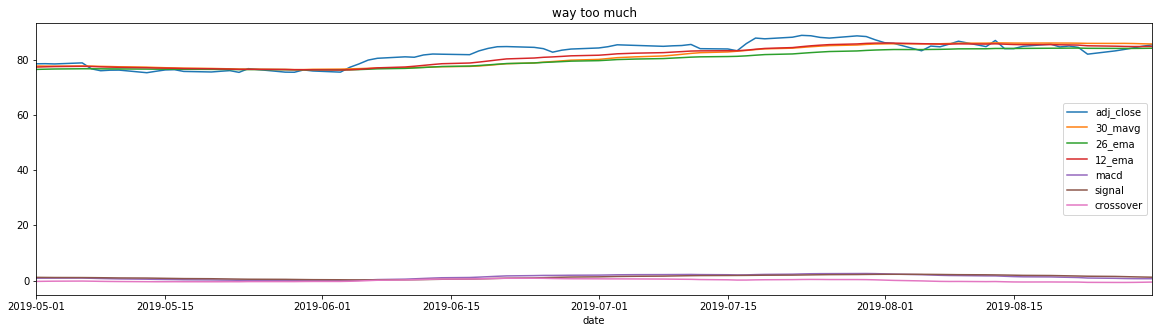

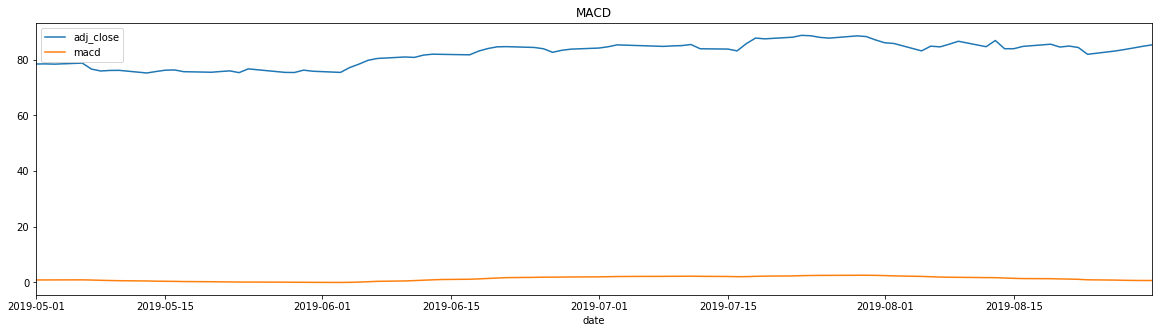

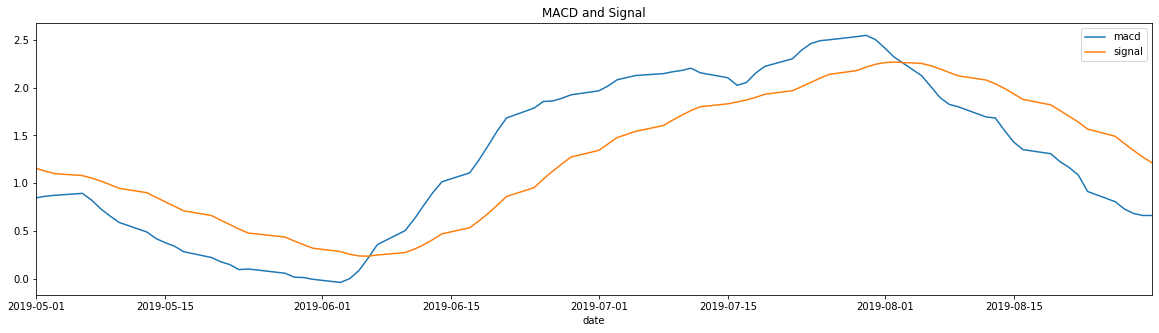

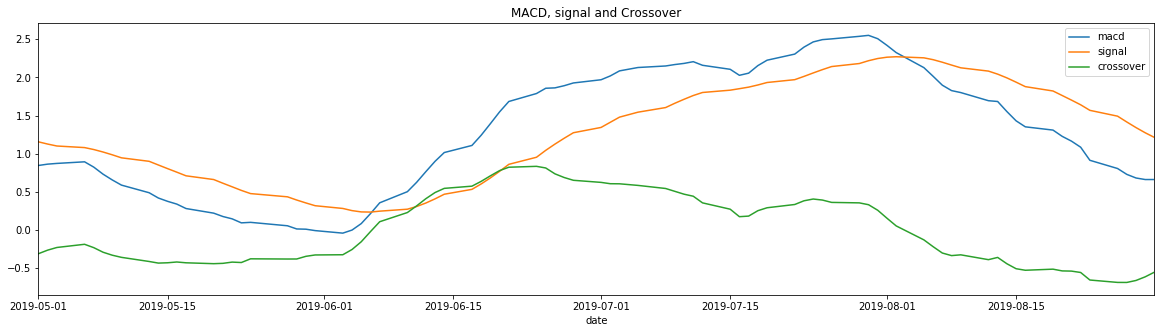

In [10]:
# df.tail(720).plot(figsize=(20, 5))

startdate = pd.to_datetime("2019-05-01").date()
enddate = pd.to_datetime("2019-09-01").date()
df[startdate:enddate].plot(y=['adj_close','30_mavg', '26_ema', '12_ema', 'macd', 'signal', 'crossover'], title='way too much', figsize=(20, 5))
df[startdate:enddate].plot(y=['adj_close', 'macd'], title='MACD', figsize=(20, 5))
df[startdate:enddate].plot(y=['macd', 'signal'], title='MACD and Signal', figsize=(20, 5))
df[startdate:enddate].plot(y=['macd', 'signal', 'crossover'], title='MACD, signal and Crossover', figsize=(20, 5))
